In [1]:
import math
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz

import scipy.stats
import scipy.optimize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


(0, 6)

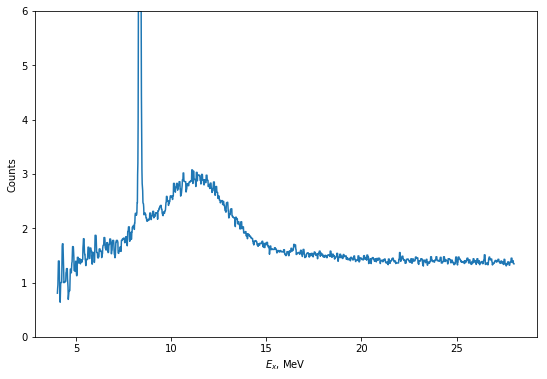

In [2]:
red_4_28 = pd.read_csv('../B(GT) peaks processing/recognition/red data/4_28_red.csv', 
                      sep='\t', decimal=',')

plt.figure(figsize=(9,6))
plt.plot(red_4_28['x'].values, red_4_28['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')
plt.ylim(0,6)

(0, 6)

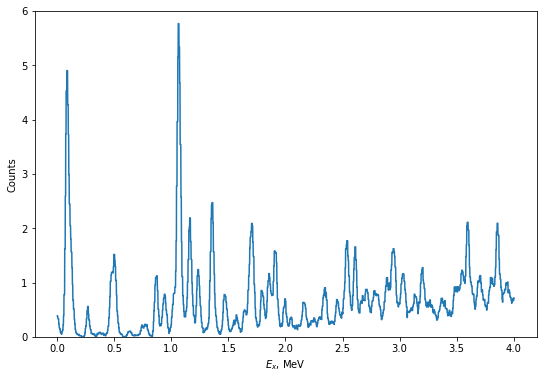

In [3]:
red_0_4 = pd.read_csv('../B(GT) peaks processing/recognition/red data/0_4_red.csv', 
                      sep='\t', decimal=',')

plt.figure(figsize=(9,6))
plt.plot(red_0_4['x'].values, red_0_4['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')
plt.ylim(0,6)

(0, 14)

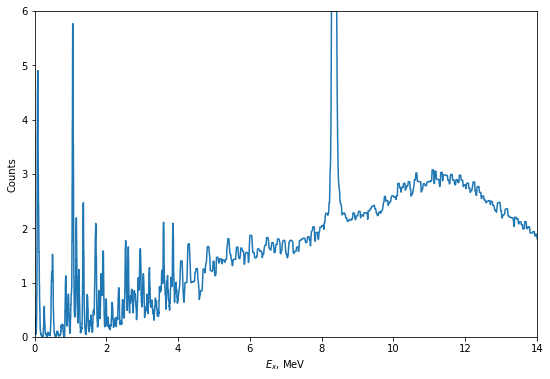

In [4]:
summ = pd.concat([red_0_4, red_4_28])

plt.figure(figsize=(9,6))
plt.plot(summ['x'].values, summ['y'].values)
plt.xlabel('$E_x$, MeV')
plt.ylabel('Counts')
plt.ylim(0,6)
plt.xlim(0,14)

(5, 15)

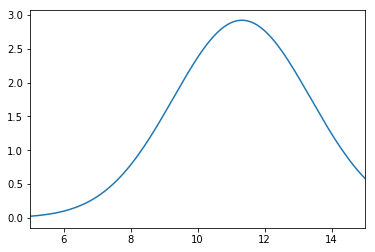

In [5]:
mu = 11.32338743
sigma = 2.04836474
k = 1.40655398

def gauss(x, mu, sigma, k):
    y = k*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))
    return np.round(y, decimals=5) #округляем чтобы убрать неустойчивость расчета изза хвостов

x_norm = np.arange(0, 28, 0.1)
y_norm = gauss(x_norm, mu, sigma, k)

#y_norm = y_norm/trapz(y_norm, x_norm)*36
y_norm = y_norm/trapz(y_norm, x_norm)*15

plt.plot(x_norm, y_norm)
plt.xlim(5,15)


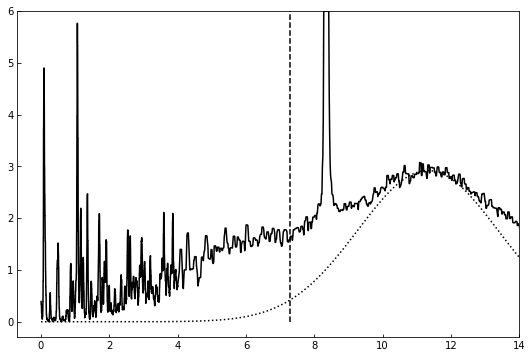

In [6]:
plt.figure(figsize=(9,6))
plt.plot(summ['x'].values, summ['y'].values, c='black')
plt.plot(x_norm, y_norm, c='black', ls=':')
#plt.axvline(x=7.3, c='black', ls='--')
plt.vlines(x=7.3, ymin=0, ymax=6, linestyle='dashed')
#plt.fill_between(y=summ['y'].values, x1=summ['x'].values, x=7.3)
#plt.xlabel('$E_x$, MeV', horizontalalignment='left')
#plt.ylabel('Counts')
plt.margins(x=0.025, y=0.05, tight=False)

plt.ylim(ymax=6)
plt.xlim(xmax=14)
plt.tick_params(axis='both', which='major', direction='in')

#plt.savefig('full_spectra.png', format='png', dpi=600)

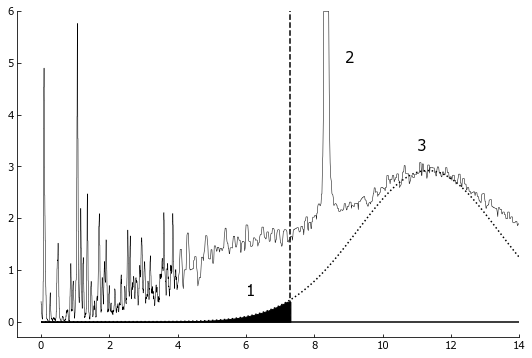

In [18]:
from matplotlib import rc

font = {'family': 'Verdana', 'weight': 'normal'}
rc('font', **font)

#font = {'family': 'Times New Roman', 'weight': 'normal'}
#rc('font', **font)


x1 = summ['x'].values
y1 = summ['y'].values
S_n = 7.3

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.plot(x1, y1, c='black', linewidth=0.5)
ax.plot(x_norm, y_norm, c='black', ls=':')
ax.vlines(x=S_n, ymin=0, ymax=6, linestyle='dashed')
ax.hlines(0, xmin=0, xmax=20)
ax.text(6, 0.5, '1', fontsize=15)
ax.text(8.9, 5, '2', fontsize=15)
ax.text(11, 3.3, '3', fontsize=15)

#plt.xlabel('$E_x$, MeV', horizontalalignment='left')
#plt.ylabel('Т')
ax.margins(x=0.025, y=0.05, tight=False)
ax.set_xlim(xmax=14)
ax.set_ylim(ymax=6)
ax.tick_params(axis='both', which='major', direction='in')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.fill_betweenx(y_norm, x_norm, S_n, where= x_norm < S_n, color = 'black')

# clears last tick label
#xticks = ax.get_xticks().tolist()
#xticks[-1] = ''
#ax.set_xticklabels(xticks)
#yticks = ax.get_yticks().tolist()
#yticks[-1] = ''
#ax.set_yticklabels(yticks)
# sets axes labels on both ends
#ax.annotate('$\it{E}$, МэВ', xy=(0.95, -0.06), ha='left', va='top', xycoords='axes fraction', fontsize=15)
#ax.annotate('$S(E),$ $МэВ^{-1}$', xy=(-0.05, 1.07), xytext=(-15,2), ha='left', va='top', xycoords='axes fraction', textcoords='offset points', fontsize=15)


#plt.savefig('../../../../../full_spectra5.png', format='png', dpi=600)
plt.savefig('picture_2.png', format='png', dpi=600)
plt.show()